In [2]:
from pylab import*
import numpy as np
from PIL import*
import matplotlib.pyplot as plt

# Görüntüyü yükleme (gri tonlamalı olarak)
image = array(Image.open("Gemini_Generated_Image_lk1cj7lk1cj7lk1c.jpg").convert("L"))

In [4]:
image

array([[227, 227, 226, ...,  57,  57,  57],
       [227, 226, 226, ...,  57,  57,  57],
       [227, 226, 226, ...,  56,  55,  55],
       ...,
       [ 75,  74,  74, ...,   6,   6,   6],
       [ 74,  74,  74, ...,   6,   6,   6],
       [ 74,  74,  74, ...,   6,   6,   6]], dtype=uint8)

In [8]:
def sobel(image,sobel_yonu="x"):

    if sobel_yonu=="x":
        kernel=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    elif sobel_yonu=="y":
        kernel=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    else:
        raise ValueError("hatalı bir sobel değeri verilmiştir")     
    kernelDizisi =[]
    sobel_veri = zeros((len(image),len(image[0])))
    for i in range(len(image)):
        for j in range(len(image[0])):
            if(i-1<0 or i+1>len(image)-1) or (j-1 <0 or j+1 > len(image[0])-1):
                sobel_veri[i][j]=0
            else:
                for k in range(3):
                    for m in range(3):
                        kernelDizisi.append(image[i - 1+k][j - 1+m]*kernel[k,m])  
            piksel=sum(array(kernelDizisi))      
            if len(kernelDizisi)==9:
                sobel_veri[i][j]=piksel
            kernelDizisi=[] 
    return sobel_veri     

In [9]:
yeniImage_x=sobel(image,sobel_yonu="x")
x1=np.concatenate((image,yeniImage_x),axis=1)

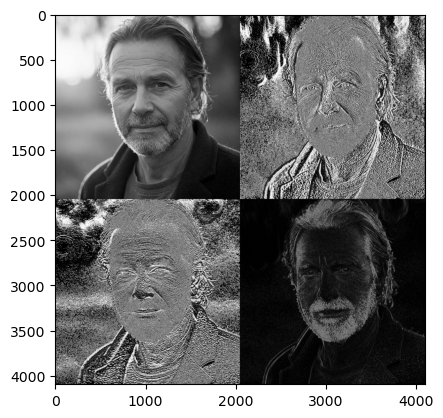

In [10]:
yeniImage_y=sobel(image,sobel_yonu="y")
yeniImage=np.sqrt(yeniImage_x**2+yeniImage_x**2)
x2=np.concatenate((yeniImage_y,yeniImage), axis=1)
x=vstack((x1,x2))
img=Image.fromarray(x.astype(uint8))
imshow(img,cmap="gray")


In [11]:
img.save("output_image.jpg")